In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [21]:
from pathlib import Path

data_dir = Path("/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos")
data_dir

PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos')

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images found: {image_count}")

Total images found: 3670


In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

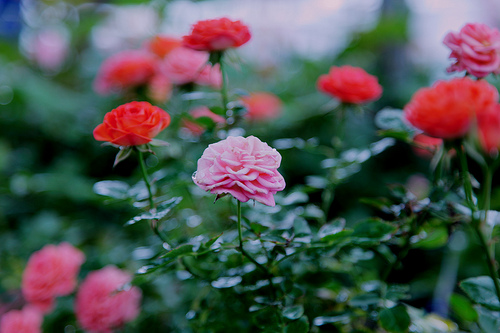

In [25]:
PIL.Image.open(str(roses[1]))

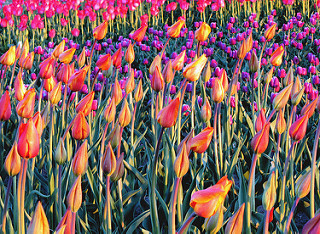

In [26]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [31]:
str(flowers_images_dict['roses'][0])

'/Users/bhattbruh/Desktop/Projects/DeepLearning/datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
img.shape

(243, 500, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [37]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
X = np.array(X)
y =np.array(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2025-11-15 08:49:43.031779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.4099 - loss: 1.3916
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5185 - loss: 1.1595
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5229 - loss: 1.1908
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6323 - loss: 0.9690
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6602 - loss: 0.8825
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7068 - loss: 0.8290
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6112 - loss: 1.2601
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6846 - loss: 0.8663
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7711 - loss: 0.6373
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8045 - loss: 0.5782
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8234 - loss: 0.5015
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8557 - l

In [45]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6057 - loss: 12.4425


[12.442527770996094, 0.6056644916534424]

In [46]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[-27.546688 ,  -2.193905 ,   2.7364607, -76.21322  , -57.15893  ],
       [ 22.039478 , -32.86511  , -47.654762 , -24.075747 , -12.054826 ],
       [-63.63571  , -45.067253 ,   6.1549635, -57.177048 , -43.010098 ],
       ...,
       [-60.178673 ,  -9.908249 ,   0.3103056,  -5.1849794, -30.223902 ],
       [  7.4617405, -35.012978 , -30.349876 , -61.787395 , -12.901431 ],
       [-69.94076  , -59.603268 , -66.90409  ,  48.617027 , -72.49736  ]],
      dtype=float32)

In [47]:
score = tf.nn.softmax(predictions[0])

In [48]:
np.argmax(score)

2

In [49]:
y_test[0]

1

In [53]:
img_height = 180
img_width = 180

In [54]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                      input_shape=(img_height, 
                                   img_width,
                                   3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/Users/bhattbruh/Desktop/Projects/DeepLearning/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


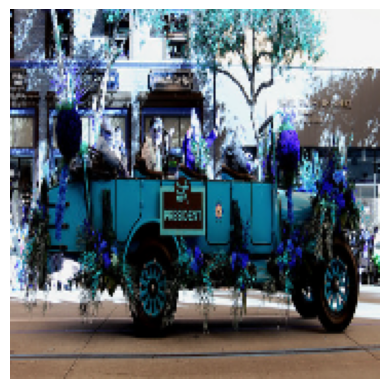

In [55]:
plt.axis('off')
plt.imshow(X[0])

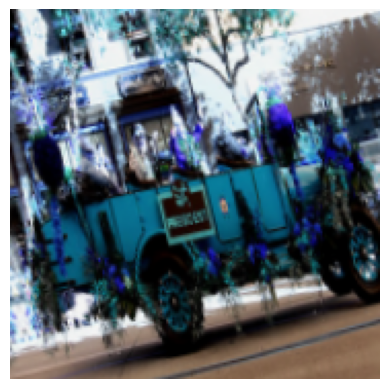

In [56]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [57]:
#Train the model using data augmentation and a drop out layer
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3710 - loss: 1.4868
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5429 - loss: 1.1370
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5781 - loss: 1.0930
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5650 - loss: 1.2037
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5552 - loss: 1.2490
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5029 - loss: 1.4551
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.4190 - loss: 1.8733
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5102 - loss: 1.4273
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5273 - loss: 1.4031
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6021 - loss: 1.0914
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5930 - loss: 1.2502
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy:

In [58]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4009 - loss: 4779.3574


[4779.357421875, 0.4008714556694031]